TODO: Add PCA and compare with RFE. Add hierarchical clustering with dendogram if time.
<br /> Data doesn't cluster well, basis for needing non-trivial recommendation

In [12]:
import pandas as pd 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
#%matplotlib notebook

from sklearn import cross_validation as cv
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics.pairwise import cosine_similarity
from scipy import sparse

%pylab inline


Populating the interactive namespace from numpy and matplotlib


/home/kristina/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['sqrt', 'array']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
# datasets provided by https://github.com/llSourcell/recommender_live
dataset1 = '/home/kristina/Downloads/10000.txt'
dataset2 = '/home/kristina/Downloads/song_data.csv'

temp_df1 = pd.read_csv(dataset1, sep="\t", names =["user_id", "song_id", "listen_count"])
temp_df2 = pd.read_csv(dataset2)

final_df = pd.merge(temp_df1, temp_df2)
final_df.head()

,user_id,song_id,listen_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1.0,The Cove,Thicker Than Water,Jack Johnson,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2.0,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,930d2be6c85315d72cab9823ec0f7bfe7e477794,SOBBMDR12A8C13253B,1.0,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1.0,Stronger,Graduation,Kanye West,2007
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1.0,Stronger,Graduation,Kanye West,2007


In [3]:
final_df["user_id"] = pd.Categorical(final_df["user_id"])
final_df['user_id'] = final_df["user_id"].cat.codes

final_df["song_id"] = pd.Categorical(final_df["song_id"])
final_df['song_id'] = final_df["song_id"].cat.codes

final_df["title"] = pd.Categorical(final_df["title"])
final_df['title'] = final_df["title"].cat.codes

final_df["release"] = pd.Categorical(final_df["release"])
final_df['release'] = final_df["release"].cat.codes

final_df["artist_name"] = pd.Categorical(final_df["artist_name"])
final_df['artist_name'] = final_df["artist_name"].cat.codes

final_df.head()


,user_id,song_id,listen_count,title,release,artist_name,year
0,278,78,1.0,4404,2929,847,0
1,278,233,2.0,1272,946,1385,1976
2,219,233,1.0,1272,946,1385,1976
3,278,414,1.0,4169,1065,982,2007
4,278,414,1.0,4169,1065,982,2007


In [6]:
print("Columns " + str(final_df.columns))
array = final_df.values
X = array[:,0:6]
Y = array[:,6]

model = LogisticRegression()
rfe = RFE(model, 3)
fit = rfe.fit(X, Y)
print("Number " +  str(fit.n_features_))
print("Usable " + str(fit.support_))
print("Ranking " + str(fit.ranking_))

Columns Index(['user_id', 'song_id', 'listen_count', 'title', 'release', 'artist_name',
       'year'],
      dtype='object')
Number 3
Usable [ True False  True False  True False]
Ranking [1 4 1 3 1 2]


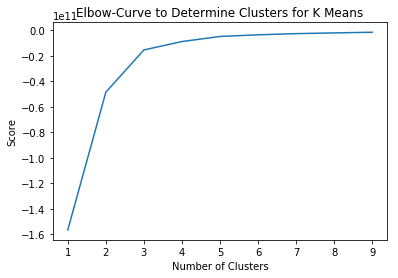

In [10]:
elbow_df = final_df
elbow_df.fillna(0, inplace=True)
elbow_df = elbow_df.as_matrix()
elbow_df = elbow_df.reshape(-1, 1)

Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(elbow_df).score(elbow_df) for i in range(len(kmeans))]

plt.plot(Nc, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow-Curve to Determine Clusters for K Means')
plt.show()

/home/kristina/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


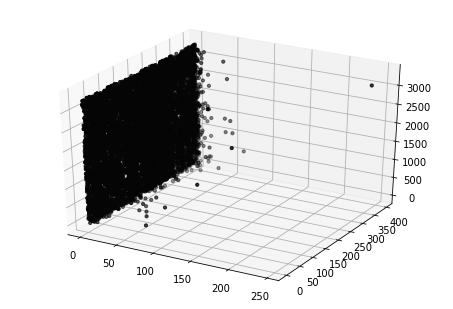

In [14]:
f1 = final_df["listen_count"].values
f2 = final_df["user_id"].values
f3 = final_df["release"].values

#X = np.array(list(zip(f1, f2)))
#plt.plot(f1, f2)
#plt.xlabel('Listed Count')
#plt.ylabel('Song')
#plt.scatter(f1, f2,  c='black', s=20)
#plt.show()

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(f1, f2, f3,  c='#050505', s=10)
fig.show()


[[  2.78000000e+02   1.00000000e+00   2.92900000e+03]]


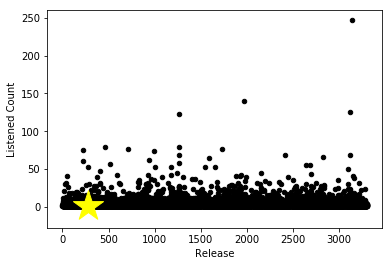

In [19]:
processed_df = final_df[['user_id','listen_count', 'release']]
f2 = processed_df["listen_count"].values
f1 = processed_df["release"].values
#f3 = processed_df["release"].values

df_lcr = processed_df.iloc[:1, :3]

kmeans = KMeans(n_clusters=1, n_init=10,
 random_state=1)
kmeans = kmeans.fit(df_lcr)
labels = kmeans.predict(df_lcr)
centroid = kmeans.cluster_centers_
print(centroid)

#X = np.array(list(zip(f1, f2)))
plt.xlabel('Release')
plt.ylabel('Listened Count')
plt.scatter(f1, f2, c='black', s=20)
plt.scatter(centroid[:, 0], centroid[:, 1], marker='*', c='#ffff00', s=1000)
plt.show()


[[ 123.02298333    3.65254619]
 [ 279.30772686    2.56244385]
 [ 209.77893118    2.35101884]
 [ 357.85522531    3.36097795]
 [  38.69175627    3.09229391]]


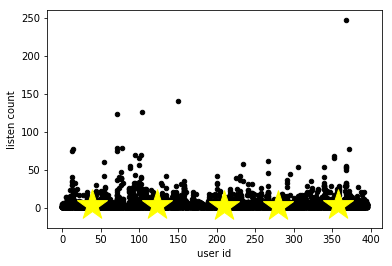

In [36]:
f2 = processed_df["listen_count"].values
f1 = processed_df["user_id"].values

df_lcu = processed_df.iloc[:, :2]

kmeans = KMeans(n_clusters=5, n_init=10,
 random_state=1)
kmeans = kmeans.fit(df_lcu)
labels = kmeans.predict(df_lcu)
centroid = kmeans.cluster_centers_
print(centroid)

plt.xlabel('user id')
plt.ylabel('listen count')
plt.scatter(f1, f2, c='black', s=20)
plt.scatter(centroid[:, 0], centroid[:, 1], marker='*', c='#ffff00', s=1000)
plt.show()

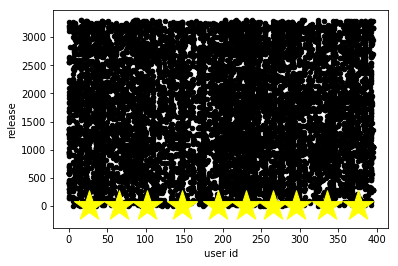

In [50]:
f2 = processed_df["release"].values
f1 = processed_df["user_id"].values
#f3 = processed_df["release"].values

df1 = processed_df.iloc[:, :2]

kmeans = KMeans(n_clusters=10, n_init=10,
 random_state=1)
kmeans = kmeans.fit(df1)
labels = kmeans.predict(df1)
centroid = kmeans.cluster_centers_
#print(centroid)


plt.xlabel('user id')
plt.ylabel('release')
plt.scatter(f1, f2, c='black', s=20)
plt.scatter(centroid[:, 0], centroid[:, 1], marker='*', c='#ffff00', s=1000)
plt.show()

In [45]:
classified_data = kmeans.labels_
cluster_map = df_lcu.copy()
cluster_map['Cluster Class'] = pd.Series(classified_data, index=cluster_map.index)
cluster_map.head(n=10)

,user_id,listen_count,Cluster Class
0,278,1.0,0
1,278,2.0,0
2,219,1.0,0
3,278,1.0,0
4,278,1.0,0
5,246,19.0,0
6,246,19.0,0
7,198,1.0,0
8,198,1.0,0
9,136,2.0,0
